In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
import urllib.request as url
import json

In [ ]:
path = "https://data.covid19india.org/states_daily.json"
response = url.urlopen(path)

In [ ]:
data = json.load(response)

In [ ]:
type(data)

dict

In [ ]:
data.keys()

dict_keys(['states_daily'])

In [ ]:
df = pd.DataFrame(data['states_daily'])

In [ ]:
df.shape

(1563, 42)

In [ ]:
df.head()

,an,ap,ar,as,br,ch,ct,date,dateymd,dd,dl,dn,ga,gj,hp,hr,jh,jk,ka,kl,la,ld,mh,ml,mn,mp,mz,nl,or,pb,py,rj,sk,status,tg,tn,tr,tt,un,up,ut,wb
0,0,1,0,0,0,0,0,14-Mar-20,2020-03-14,0,7,0,0,0,0,14,0,2,6,19,0,0,14,0,0,0,0,0,0,1,0,3,0,Confirmed,1,1,0,81,0,12,0,0
1,0,0,0,0,0,0,0,14-Mar-20,2020-03-14,0,1,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,1,0,Recovered,0,0,0,9,0,4,0,0
2,0,0,0,0,0,0,0,14-Mar-20,2020-03-14,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Deceased,0,0,0,2,0,0,0,0
3,0,0,0,0,0,0,0,15-Mar-20,2020-03-15,0,0,0,0,0,0,0,0,0,0,5,0,0,18,0,0,0,0,0,0,0,0,1,0,Confirmed,2,0,0,27,0,1,0,0
4,0,0,0,0,0,0,0,15-Mar-20,2020-03-15,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,Recovered,1,0,0,4,0,0,0,0


In [ ]:
df.columns

Index(['an', 'ap', 'ar', 'as', 'br', 'ch', 'ct', 'date', 'dateymd', 'dd', 'dl',
       'dn', 'ga', 'gj', 'hp', 'hr', 'jh', 'jk', 'ka', 'kl', 'la', 'ld', 'mh',
       'ml', 'mn', 'mp', 'mz', 'nl', 'or', 'pb', 'py', 'rj', 'sk', 'status',
       'tg', 'tn', 'tr', 'tt', 'un', 'up', 'ut', 'wb'],
      dtype='object')

In [ ]:
df.shape[0] / 3

521.0

In [ ]:
df['dl'][0]

'7'

In [ ]:
df['date'][0]

'14-Mar-20'

In [ ]:
df['dl'] = df['dl'].astype('int32')
df['up'] = df['up'].astype('int32')
df['mh'] = df['mh'].astype('int32')
df['rj'] = df['rj'].astype('int32')
df['pb'] = df['pb'].astype('int32')
df['tt'] = df['tt'].astype('int32')

In [ ]:
df['dl'][0]

7

In [ ]:
df['dateymd'] = pd.to_datetime(df['dateymd'])

In [ ]:
df['dateymd'][0]

Timestamp('2020-03-14 00:00:00')

In [ ]:
confirmed_df = df[df['status'] == 'Confirmed']
recovered_df = df[df['status'] == 'Recovered']
deceased_df = df[df['status'] == 'Deceased']

In [ ]:
confirmed_df.shape

(521, 42)

In [ ]:
confirmed_df.head()

,an,ap,ar,as,br,ch,ct,date,dateymd,dd,dl,dn,ga,gj,hp,hr,jh,jk,ka,kl,la,ld,mh,ml,mn,mp,mz,nl,or,pb,py,rj,sk,status,tg,tn,tr,tt,un,up,ut,wb
0,0,1,0,0,0,0,0,14-Mar-20,2020-03-14,0,7,0,0,0,0,14,0,2,6,19,0,0,14,0,0,0,0,0,0,1,0,3,0,Confirmed,1,1,0,81,0,12,0,0
3,0,0,0,0,0,0,0,15-Mar-20,2020-03-15,0,0,0,0,0,0,0,0,0,0,5,0,0,18,0,0,0,0,0,0,0,0,1,0,Confirmed,2,0,0,27,0,1,0,0
6,0,0,0,0,0,0,0,16-Mar-20,2020-03-16,0,0,0,0,0,0,0,0,1,1,3,0,0,6,0,0,0,0,0,1,0,1,0,0,Confirmed,1,0,0,15,0,0,1,0
9,0,0,0,0,0,0,0,17-Mar-20,2020-03-17,0,1,0,0,0,0,1,0,0,2,0,0,0,3,0,0,0,0,0,0,0,0,0,0,Confirmed,1,0,0,11,0,2,0,1
12,0,0,0,0,0,0,0,18-Mar-20,2020-03-18,0,2,0,0,0,0,1,0,1,5,0,8,0,3,0,0,0,0,0,1,1,0,3,0,Confirmed,8,1,0,37,0,2,1,0


In [ ]:
confirmed_df['dl'].sum()

1437118

In [ ]:
confirmed_df['dl'].max()

28395

In [ ]:
confirmed_df['dl'].mean()

2758.383877159309

In [ ]:
states = ['dl','up','rj','mh','pb']
for i in range(len(states)):
  conf = confirmed_df[states[i]].sum()
  rec = recovered_df[states[i]].sum()
  dec = deceased_df[states[i]].sum()
  print(states[i])
  print("Total Confirmed Cases :",conf)
  print("Total Recovered Cases :",rec)
  print("Total Deceased Cases :",dec)
  print("*"*20)

dl
Total Confirmed Cases : 1437118
Total Recovered Cases : 1411582
Total Deceased Cases : 25069
********************
up
Total Confirmed Cases : 1708965
Total Recovered Cases : 1685761
Total Deceased Cases : 22785
********************
rj
Total Confirmed Cases : 953954
Total Recovered Cases : 944820
Total Deceased Cases : 8954
********************
mh
Total Confirmed Cases : 6396805
Total Recovered Cases : 6195744
Total Deceased Cases : 135138
********************
pb
Total Confirmed Cases : 599972
Total Recovered Cases : 583071
Total Deceased Cases : 16344
********************


In [ ]:
sorted_df = confirmed_df.sort_values(by='tt', ascending=False)

In [ ]:
sorted_df[['date','tt']].head()

,date,tt
1254,06-May-21,414280
1251,05-May-21,412624
1257,07-May-21,406901
1260,08-May-21,403808
1236,30-Apr-21,402014


In [ ]:
plt.style.use('ggplot')

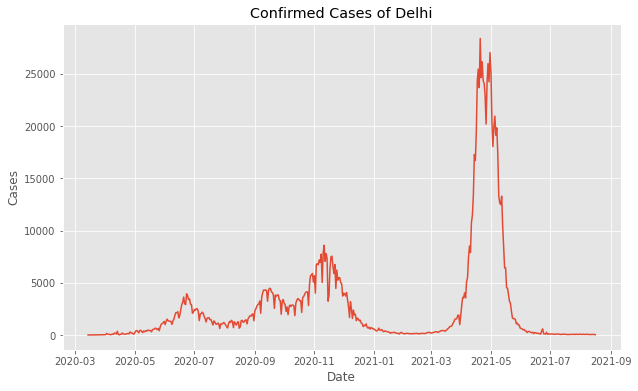

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(confirmed_df['dateymd'], confirmed_df['dl'])
plt.title("Confirmed Cases of Delhi")
plt.xlabel("Date")
plt.ylabel("Cases")
plt.show()

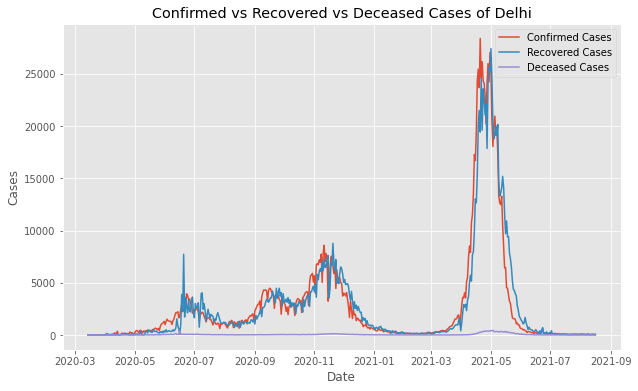

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(confirmed_df['dateymd'], confirmed_df['dl'], label='Confirmed Cases')
plt.plot(recovered_df['dateymd'], recovered_df['dl'], label='Recovered Cases')
plt.plot(deceased_df['dateymd'], deceased_df['dl'], label='Deceased Cases')
plt.title("Confirmed vs Recovered vs Deceased Cases of Delhi")
plt.xlabel("Date")
plt.ylabel("Cases")
plt.legend()
plt.show()

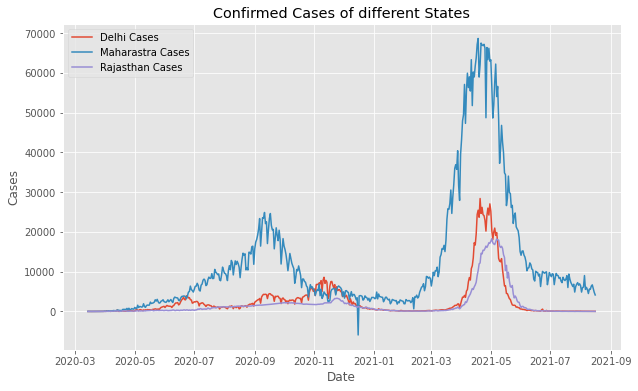

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(confirmed_df['dateymd'], confirmed_df['dl'], label='Delhi Cases')
plt.plot(confirmed_df['dateymd'], confirmed_df['mh'], label='Maharastra Cases')
plt.plot(confirmed_df['dateymd'], confirmed_df['rj'], label='Rajasthan Cases')
plt.title("Confirmed Cases of different States")
plt.xlabel("Date")
plt.ylabel("Cases")
plt.legend()
plt.show()